# Présentation

Ce notebook contient les consignes ainsi que des emplacements vides pour apporter les réponses aux questions posées.

Ne changez pas les noms de variable qui vous sont proposées.




# Echauffement

## Création DataFrame à partir de 0 

A partir d'une base de données SQLite3 dont le code python est présent ci-dessous, nous allons recréer un dataframe manuellement basée sur les mêmes données. En seconde partie, nous verrons comment convertir un résultat de requêtes SQL directement en dataframe

```csv
fruit,origin,quantity
apple,france,12
apple,germany,78
apple,france,19
orange,france,10
orange,germany,98
strawberry,spain,2
```

la requête SQL pour créer la table contenant ces données

```sql
CREATE TABLE basket(fruit text, origin text, quantity int)
```


In [1]:
import pandas as pd

Créer une série représentant la colonne `fruit` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [2]:
fruit = pd.Series(['apple', 'apple', 'apple', 'orange', 'orange', 'strawberry'])

Créer une série représentant la colonne `origin` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [3]:
origin = pd.Series(['france', 'germany', 'france', 'france', 'germany', 'spain'])

Créer une série représentant la colonne `quantity` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [4]:
quantity = pd.Series([12, 78, 19, 10, 98, 2])

Créer un dataframe composé de ces 3 séries créées précédemment grâce au constructeur [`pd.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)

In [5]:
basket = pd.DataFrame({'fruit': fruit, 'origin':origin, 'quantity':quantity})
basket

,fruit,origin,quantity
0,apple,france,12
1,apple,germany,78
2,apple,france,19
3,orange,france,10
4,orange,germany,98
5,strawberry,spain,2


## Création DataFrame à partir d'un fichier CSV

Vous obtenez une seconde série de données, via un fichier CSV cette fois-ci. Vous pouvez donc lire le fichier CSV directement via la méthode `read_csv`.

Ce fichier CSV contient les informations suivantes

```csv
fruit,origin,quantity
kiwi,uk,12
kiwi,new zealand,78
pineapple,france,19
blueberry,canada,10
blueberry,canada,98
strawberry,spain,2
```

In [6]:
basketTom = pd.read_csv('basketTom.csv')
basketTom

,fruit,origin,quantity
0,kiwi,uk,12
1,kiwi,new zealand,78
2,pineapple,france,19
3,blueberry,canada,10
4,blueberry,canada,98
5,strawberry,spain,2


Combiner les dataframes basket et basketTom en un nouveau dataframe basketFull

In [7]:
basketFull = pd.concat([basket, basketTom], ignore_index=True)
basketFull

,fruit,origin,quantity
0,apple,france,12
1,apple,germany,78
2,apple,france,19
3,orange,france,10
4,orange,germany,98
5,strawberry,spain,2
6,kiwi,uk,12
7,kiwi,new zealand,78
8,pineapple,france,19
9,blueberry,canada,10


## Requêtes sur le DataFrame
Pour répondre à chacune des questions, proposer une requête sur le dataframe `basketFull`. Attention à ne jamais modifier le dataframe `basketFull`.

Quelle est la quantité max envoyée par pays d'origine tous fruits confondus ?

In [8]:
def getMaxQuant(origin, df):
    quant = basketFull[df['origin'] == origin]['quantity'].max()
    return quant

origin = [x for x in basketFull['origin'].unique()]
quantdf=pd.DataFrame({'origin': origin , 'quantMax': [getMaxQuant(x, basketFull) for x in origin]})


In [9]:
quantdf

,origin,quantMax
0,france,19
1,germany,98
2,spain,2
3,uk,12
4,new zealand,78
5,canada,98


Quelle est la quantité totale de fruits reçus par fruit ?

In [10]:
def getMaxFruit(origin, df):
    quant = basketFull[df['fruit'] == origin]['quantity'].max()
    return quant

fruits = [x for x in basketFull['fruit'].unique()]
quantdf=pd.DataFrame({'fruits': fruits , 'quantMax': [getMaxFruit(x, basketFull) for x in fruits]})
quantdf

,fruits,quantMax
0,apple,78
1,orange,98
2,strawberry,2
3,kiwi,78
4,pineapple,19
5,blueberry,98


Afficher dans un graphique de barres empilées la quantité de fruits transférés.

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [10,5] # to display real size in vsc

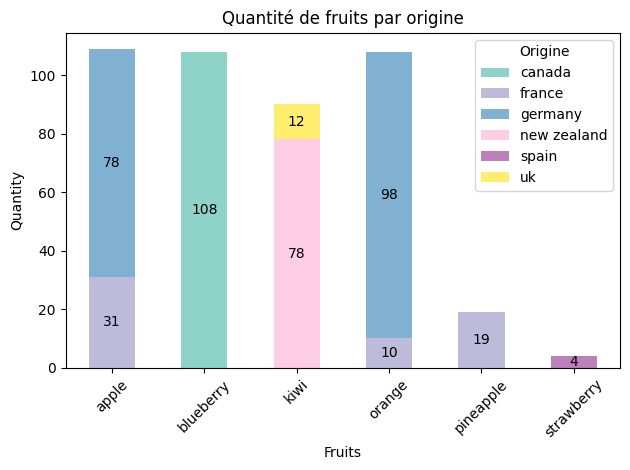

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Regrouper les données par fruit et origine, puis sommer les quantités
grouped = basketFull.groupby(['fruit', 'origin'])['quantity'].sum().unstack(fill_value=0)

# Créer le graphique à barres empilées
fig, ax = plt.subplots()
bars = grouped.plot(kind='bar', stacked=True, colormap='Set3', ax=ax)

# Ajouter les labels aux barres
for container in bars.containers:
    ax.bar_label(container, label_type='center', fontsize=10, rotation=0, labels=[int(height) if height != 0 else '' for height in container.datavalues])

# Configurer les étiquettes des axes et du titre
ax.set_xlabel('Fruits')
ax.set_ylabel('Quantity')
ax.set_title('Quantité de fruits par origine')

# Afficher le graphique
plt.legend(title='Origine', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Transactions immobilières

Pour cette seconde partie, nous repartons sur la collecte des transactions immobilières et nous allons tenter d'identifier les caractéristiques les plus pertinentes.

Télécharger le [fichier des transactions immobilières](https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-160733/valeursfoncieres-2022.txt)

Créer un premier dataframe qui ne va conserver que les transactions relatives à Charleville-Mézières.

Modifier le dataframe pour convertir les montants en k€.

Conserver dans le dataframe uniquement les colonnes utiles :
- No voie
- Type de voie
- Code voie
- Voie
- Code postal
- Commune
- Code departement
- Code commune
- Valuer fonciere
- Nombre pieces principales
- Surface Carrez du 1er lot

Grâce l'[API Adresse](https://adresse.data.gouv.fr/api-doc/adresse), envoyer votre fichier d'adresse pour récupérer les coordonnées GPS correspondantes

Construire un nouveau dataframe contenant uniquement latitude, longitude, valeur foncière, surface et nbre de pièces


Afficher un 1er graphique x = latitude, y = longitude et la couleur correspondant au prix sous forme de scatter.

Indiquer quelle est la valeur de la transaction immobilière la plus importante.

Où se situe le centre géographique de toutes les transactions enregistrées ?


In [13]:
import requests, urllib
import json

In [14]:
Immo = pd.read_csv("./valeursfoncieres-2022.csv", sep='|')

/var/folders/vp/_k50w21x033cx90pwm5wxzxc0000gn/T/ipykernel_23881/3772745319.py:1: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  Immo = pd.read_csv("./valeursfoncieres-2022.csv", sep='|')


In [15]:
Immo = Immo[['No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal', 'Commune', 'Valeur fonciere', 'Nombre pieces principales', 'Surface Carrez du 1er lot']]

In [16]:
Immo.head(10)

,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Valeur fonciere,Nombre pieces principales,Surface Carrez du 1er lot
0,13.0,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,"55000,00",1.0,"24,10"
1,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,"143000,00",NaN,NaN
2,NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,"143000,00",NaN,NaN
3,98.0,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,"143000,00",3.0,"123,23"
4,NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,"300,00",NaN,NaN
5,282.0,RTE,0130,DE POISATON,1560.0,MANTENAY-MONTLIN,"255000,00",5.0,NaN
6,NaN,NaN,B047,LA FREGONIERE,1560.0,MANTENAY-MONTLIN,"255000,00",NaN,NaN
7,NaN,PL,0300,DE LA CROIX BLANCHE,1390.0,SAINT-ANDRE-DE-CORCY,"525000,00",NaN,NaN
8,217.0,PL,0300,DE LA CROIX BLANCHE,1390.0,SAINT-ANDRE-DE-CORCY,"525000,00",0.0,NaN
9,217.0,PL,0300,DE LA CROIX BLANCHE,1390.0,SAINT-ANDRE-DE-CORCY,"525000,00",4.0,NaN


In [17]:
Immo.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803885 entries, 0 to 3803884
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   No voie                    2482658 non-null  float64
 1   Type de voie               2397045 non-null  object 
 2   Code voie                  3764842 non-null  object 
 3   Voie                       3764732 non-null  object 
 4   Code postal                3764712 non-null  float64
 5   Commune                    3803885 non-null  object 
 6   Valeur fonciere            3779164 non-null  object 
 7   Nombre pieces principales  2283343 non-null  float64
 8   Surface Carrez du 1er lot  367738 non-null   object 
dtypes: float64(3), object(6)
memory usage: 261.2+ MB


In [18]:
def concatLoc(no_Voie, type_Voie ,voie, code_Postal, commune):
    if type_Voie != None:
        return str(int(no_Voie)) +' '+ str(type_Voie) + ' ' + str(voie) + ', '+ str(int(code_Postal)) +' '+ str(commune)
    else:
        return str(int(no_Voie)) +' '+ str(voie) + ', '+ str(int(code_Postal)) + ' '+  str(commune)
    
def getCoords(address): 
    '''
    this function return a list of coordonates for a given address.
    input must be a string. 
    /!\ only works in France /!\  
    can be given a single city name as input, result will be less accurate than true address.
    ''' 
    
    api_loc_url = "https://api-adresse.data.gouv.fr/search/?q="
    r = requests.get(api_loc_url + urllib.parse.quote(address))
    r = r.content.decode('unicode_escape') 

    try:
        coords = json.loads(r)
        coords = coords['features'][0]['geometry']['coordinates'][::-1]
    except:
        coords = [np.NaN, np.NaN]
    
    print(coords)
    return coords


In [19]:
ImmoCH = Immo.loc[(Immo['Commune'] == 'CHARLEVILLE-MEZIERES')]
ImmoCH = ImmoCH.loc[(Immo['Voie'].notnull()) & (Immo['Code postal'].notnull()) & (Immo['No voie'].notnull())]
ImmoCH['Adresse'] = ImmoCH.apply(lambda row: concatLoc(row['No voie'], row['Type de voie'],row['Voie'], row['Code postal'], row['Commune']), axis=1)
ImmoCH.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, 238338 to 255940
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No voie                    2273 non-null   float64
 1   Type de voie               2271 non-null   object 
 2   Code voie                  2273 non-null   object 
 3   Voie                       2273 non-null   object 
 4   Code postal                2273 non-null   float64
 5   Commune                    2273 non-null   object 
 6   Valeur fonciere            2270 non-null   object 
 7   Nombre pieces principales  2123 non-null   float64
 8   Surface Carrez du 1er lot  326 non-null    object 
 9   Adresse                    2273 non-null   object 
dtypes: float64(3), object(7)
memory usage: 195.3+ KB


In [20]:
ImmoCH.head(10)

,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Valeur fonciere,Nombre pieces principales,Surface Carrez du 1er lot,Adresse
238338,1.0,RUE,1680,HENRI RENAUDIN,8000.0,CHARLEVILLE-MEZIERES,"75000,00",2.0,NaN,"1 RUE HENRI RENAUDIN, 8000 CHARLEVILLE-MEZIERES"
238339,1.0,RUE,1680,HENRI RENAUDIN,8000.0,CHARLEVILLE-MEZIERES,"75000,00",0.0,NaN,"1 RUE HENRI RENAUDIN, 8000 CHARLEVILLE-MEZIERES"
238376,34.0,AV,0630,CHARLES DE GAULLE,8000.0,CHARLEVILLE-MEZIERES,"45000,00",0.0,"91,52","34 AV CHARLES DE GAULLE, 8000 CHARLEVILLE-MEZI..."
238377,34.0,AV,0630,CHARLES DE GAULLE,8000.0,CHARLEVILLE-MEZIERES,"45000,00",0.0,NaN,"34 AV CHARLES DE GAULLE, 8000 CHARLEVILLE-MEZI..."
238380,1.0,RUE,3450,DU RETHELOIS,8000.0,CHARLEVILLE-MEZIERES,"95000,00",4.0,NaN,"1 RUE DU RETHELOIS, 8000 CHARLEVILLE-MEZIERES"
238391,9.0,PL,3440,DE LA RESISTANCE,8000.0,CHARLEVILLE-MEZIERES,"50000,00",3.0,NaN,"9 PL DE LA RESISTANCE, 8000 CHARLEVILLE-MEZIERES"
238392,9.0,PL,3440,DE LA RESISTANCE,8000.0,CHARLEVILLE-MEZIERES,"50000,00",0.0,NaN,"9 PL DE LA RESISTANCE, 8000 CHARLEVILLE-MEZIERES"
238393,9.0,PL,3440,DE LA RESISTANCE,8000.0,CHARLEVILLE-MEZIERES,"50000,00",0.0,NaN,"9 PL DE LA RESISTANCE, 8000 CHARLEVILLE-MEZIERES"
238394,9.0,PL,3440,DE LA RESISTANCE,8000.0,CHARLEVILLE-MEZIERES,"50000,00",0.0,NaN,"9 PL DE LA RESISTANCE, 8000 CHARLEVILLE-MEZIERES"
238420,34.0,AV,0630,CHARLES DE GAULLE,8000.0,CHARLEVILLE-MEZIERES,"46000,00",1.0,NaN,"34 AV CHARLES DE GAULLE, 8000 CHARLEVILLE-MEZI..."


In [23]:
ImmoCH['Coords'] = ImmoCH.apply(lambda row: getCoords(row['Adresse']), axis=1)
ImmoCH.to_csv('ValeurFonciere-Charleville-Meziere-2022.csv')